In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter

In [2]:
# PARÁMETROS GENERALES
months_total = 12
month_now = 7
months = np.arange(1, months_total + 1)

In [3]:
# 1) BURNDOWN POR VALOR (EVM)
BAC = 3_450_000  # € Presupuesto total

planned_remaining_value = BAC * (1 - (months - 1) / (months_total - 1))
planned_remaining_value = np.clip(planned_remaining_value, 0, BAC)

EV_real = np.array([
    200_000,
    450_000,
    750_000,
    1_100_000,
    1_550_000,
    2_250_000,
    2_640_000,
    np.nan, np.nan, np.nan, np.nan, np.nan
])

actual_remaining_value = BAC - EV_real

In [4]:
# 2) BURNDOWN POR PAQUETES DE TRABAJO (WPs)
total_wps = 20

planned_remaining_wps = total_wps * (1 - (months - 1) / (months_total - 1))
planned_remaining_wps = np.clip(planned_remaining_wps, 0, total_wps)

wps_completed = np.array([
    1, 2, 3, 4, 6, 8, 10,
    np.nan, np.nan, np.nan, np.nan, np.nan
])

actual_remaining_wps = total_wps - wps_completed

In [5]:
# FORMATEADOR € → MILLONES
def millions_formatter(x, pos):
    return f"{x/1_000_000:.1f}M"

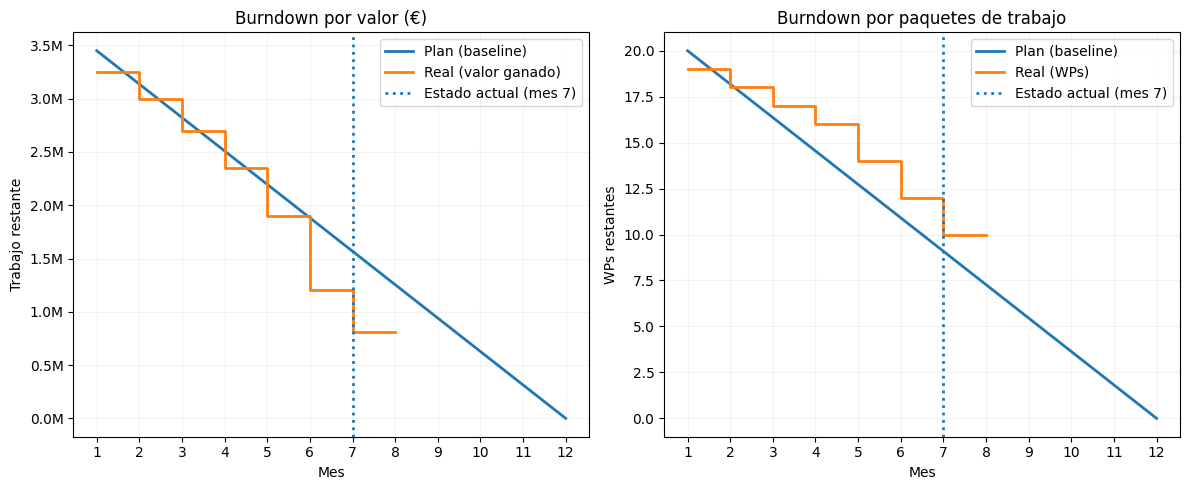

In [6]:
plt.figure(figsize=(12, 5))

# ---------- Burndown por valor ----------
ax1 = plt.subplot(1, 2, 1)
ax1.plot(months, planned_remaining_value, label="Plan (baseline)", linewidth=2)
ax1.step(months, actual_remaining_value, where="post",
         label="Real (valor ganado)", linewidth=2)
ax1.axvline(month_now, linestyle=":", linewidth=2,
            label=f"Estado actual (mes {month_now})")

ax1.set_title("Burndown por valor (€)")
ax1.set_xlabel("Mes")
ax1.set_ylabel("Trabajo restante")
ax1.set_xticks(months)
ax1.yaxis.set_major_formatter(FuncFormatter(millions_formatter))
ax1.grid(True, alpha=0.15)
ax1.legend()

# ---------- Burndown por WPs ----------
ax2 = plt.subplot(1, 2, 2)
ax2.plot(months, planned_remaining_wps, label="Plan (baseline)", linewidth=2)
ax2.step(months, actual_remaining_wps, where="post",
         label="Real (WPs)", linewidth=2)
ax2.axvline(month_now, linestyle=":", linewidth=2,
            label=f"Estado actual (mes {month_now})")

ax2.set_title("Burndown por paquetes de trabajo")
ax2.set_xlabel("Mes")
ax2.set_ylabel("WPs restantes")
ax2.set_xticks(months)
ax2.grid(True, alpha=0.15)
ax2.legend()

plt.tight_layout()
plt.show()
